<a href="https://colab.research.google.com/github/TatyanaLanceva/Netology/blob/main/7_5_theory_of_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Случайные величины и вероятности".

## Уровень 0:


### Задание 1

В магазин привезли устройства с 3-х разных предприятий.

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта.

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [ ]:
### YOUR CODE/SOLUTION HERE

# Доли устройств от каждого предприятия
shares = [0.2, 0.3, 0.5]

# Вероятности высшего сорта для каждого предприятия
qualities = [0.1, 0.05, 0.2]

# Вычисление полной вероятности
probability = sum(share * quality for share, quality in zip(shares, qualities))

# Вывод результата
print(f"Вероятность того, что случайно купленная новая продукция окажется высшего сорта: {probability:.3f}")

Вероятность того, что случайно купленная новая продукция окажется высшего сорта: 0.135


### Задание 2


Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

In [ ]:
### YOUR SOLUTION HERE

# Все возможные исходы:

outcomes = [
    ('O', 'O', 'O'),  # OOO
    ('O', 'O', 'R'),  # OOR
    ('O', 'R', 'O'),  # ORO
    ('O', 'R', 'R'),  # ORR
    ('R', 'O', 'O'),  # ROO
    ('R', 'O', 'R'),  # ROR
    ('R', 'R', 'O'),  # RRO
    ('R', 'R', 'R')   # RRR
]

# Функция для проверки событий

def is_A1(outcome): return outcome[0] == outcome[1]
def is_A2(outcome): return outcome[1] == outcome[2]
def is_A3(outcome): return outcome[0] == outcome[2]

# Подсчет вероятностей

total = len(outcomes)

# Вероятности отдельных событий

count_A1 = sum(1 for o in outcomes if is_A1(o))
count_A2 = sum(1 for o in outcomes if is_A2(o))
count_A3 = sum(1 for o in outcomes if is_A3(o))

p_A1 = count_A1 / total
p_A2 = count_A2 / total
p_A3 = count_A3 / total

# Вероятности пересечений

count_A1A2 = sum(1 for o in outcomes if is_A1(o) and is_A2(o))
count_A1A3 = sum(1 for o in outcomes if is_A1(o) and is_A3(o))
count_A2A3 = sum(1 for o in outcomes if is_A2(o) and is_A3(o))
count_A1A2A3 = sum(1 for o in outcomes if is_A1(o) and is_A2(o) and is_A3(o))

p_A1A2 = count_A1A2 / total
p_A1A3 = count_A1A3 / total
p_A2A3 = count_A2A3 / total
p_A1A2A3 = count_A1A2A3 / total

# Проверка попарной независимости

pairwise_independent = (
    abs(p_A1A2 - p_A1 * p_A2) < 1e-9 and
    abs(p_A1A3 - p_A1 * p_A3) < 1e-9 and
    abs(p_A2A3 - p_A2 * p_A3) < 1e-9
)

# Проверка совокупной независимости

independent_all = abs(p_A1A2A3 - p_A1 * p_A2 * p_A3) < 1e-9

# Вывод результатов

print("Вероятности событий:")
print(f"P(A1) = {p_A1}")
print(f"P(A2) = {p_A2}")
print(f"P(A3) = {p_A3}")
print(f"P(A1 ∩ A2) = {p_A1A2}")
print(f"P(A1 ∩ A3) = {p_A1A3}")
print(f"P(A2 ∩ A3) = {p_A2A3}")
print(f"P(A1 ∩ A2 ∩ A3) = {p_A1A2A3}")
print(f"\nПопарная независимость: {'Да' if pairwise_independent else 'Нет'}")
print(f"Совокупная независимость: {'Да' if independent_all else 'Нет'}")

Вероятности событий:
P(A1) = 0.5
P(A2) = 0.5
P(A3) = 0.5
P(A1 ∩ A2) = 0.25
P(A1 ∩ A3) = 0.25
P(A2 ∩ A3) = 0.25
P(A1 ∩ A2 ∩ A3) = 0.25

Попарная независимость: Да
Совокупная независимость: Нет


## Уровень 1:

### Задание 3


Изучите 3 распределения из библиотеки scipy: [Нормальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), [Экспоненциальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html), [Стьюдента](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). Используя функцию плотности распредления (`pdf`), постройте пять графиков плотностей для каждого распределения при разных параметрах. Запишите ваши наблюдения: как и на что влияют параметры у каждого распределения.

Дополнительная информация [тут](https://pythonguides.com/scipy-stats/).

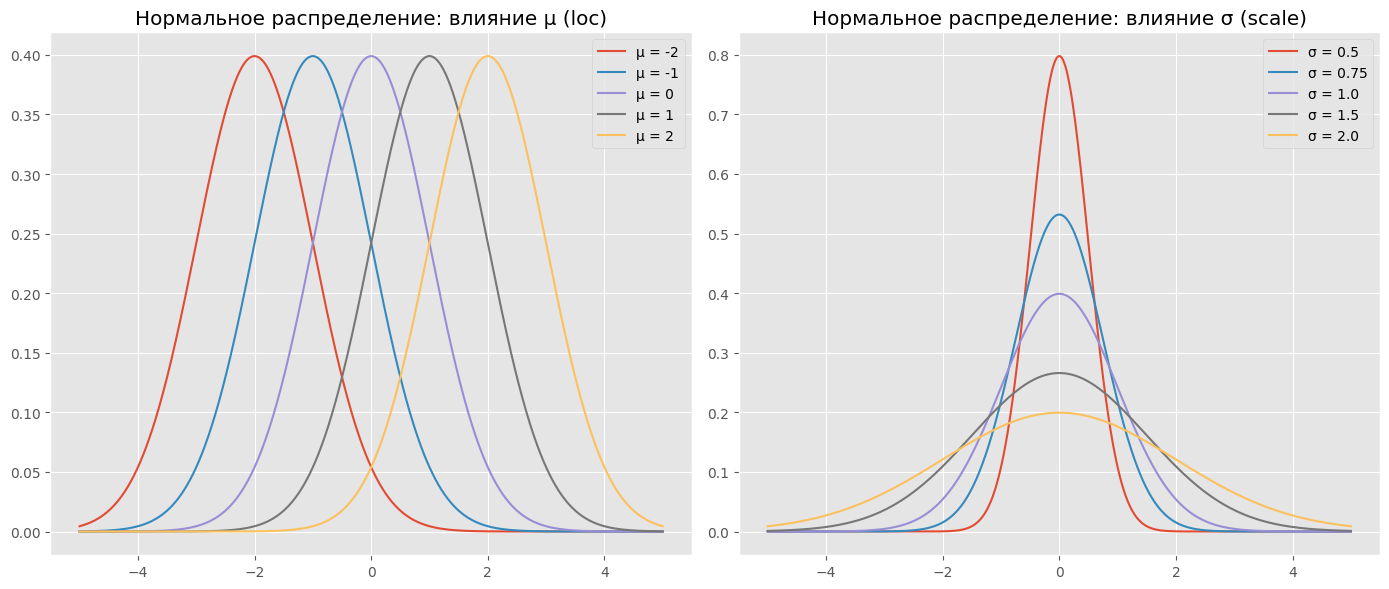

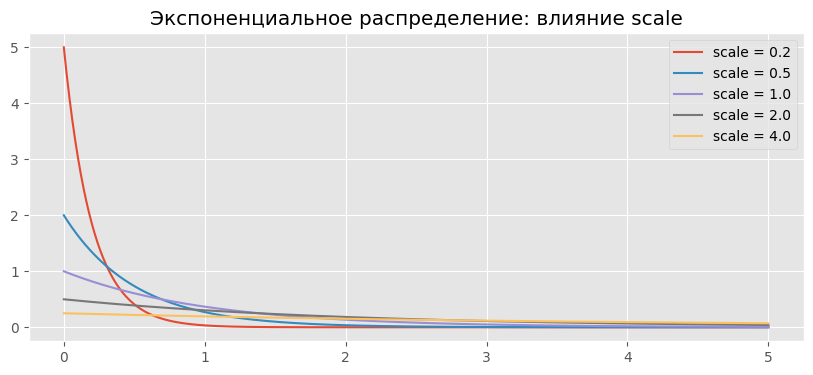

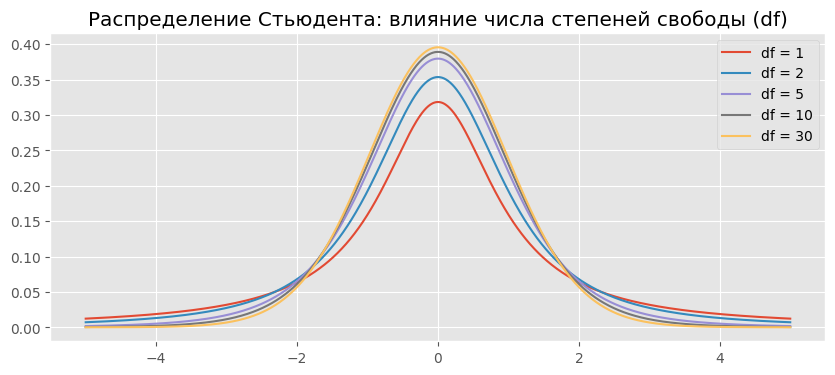

In [ ]:
### YOUR CODE HERE

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, t

# Настройки графиков
plt.style.use('ggplot')
x_common = np.linspace(-5, 5, 1000)  # Общая область по x для нормального и t-распределения

# 1. Нормальное распределение
plt.figure(figsize=(14, 6))

# Влияние loc (среднее)
plt.subplot(1, 2, 1)
mus = [-2, -1, 0, 1, 2]
for mu in mus:
    plt.plot(x_common, norm.pdf(x_common, loc=mu, scale=1), label=f'μ = {mu}')
plt.title('Нормальное распределение: влияние μ (loc)')
plt.legend()
plt.grid(True)

# Влияние scale (стандартное отклонение)
plt.subplot(1, 2, 2)
sigmas = [0.5, 0.75, 1.0, 1.5, 2.0]
for sigma in sigmas:
    plt.plot(x_common, norm.pdf(x_common, loc=0, scale=sigma), label=f'σ = {sigma}')
plt.title('Нормальное распределение: влияние σ (scale)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 2. Экспоненциальное распределение
x_exp = np.linspace(0, 5, 1000)
scales = [0.2, 0.5, 1.0, 2.0, 4.0]

plt.figure(figsize=(10, 4))
for scale in scales:
    plt.plot(x_exp, expon.pdf(x_exp, scale=scale), label=f'scale = {scale}')
plt.title('Экспоненциальное распределение: влияние scale')
plt.legend()
plt.grid(True)
plt.show()

# 3. Распределение Стьюдента
dfs = [1, 2, 5, 10, 30]

plt.figure(figsize=(10, 4))
for df in dfs:
    plt.plot(x_common, t.pdf(x_common, df=df), label=f'df = {df}')
plt.title('Распределение Стьюдента: влияние числа степеней свободы (df)')
plt.legend()
plt.grid(True)
plt.show()